In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Load the dataset
file_path = "ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

(None,
    Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
 0  Female   21    1.62    64.0                            yes   no   2.0  3.0   
 1  Female   21    1.52    56.0                            yes   no   3.0  3.0   
 2    Male   23    1.80    77.0                            yes   no   2.0  3.0   
 3    Male   27    1.80    87.0                             no   no   3.0  3.0   
 4    Male   22    1.78    89.8                             no   no   2.0  1.0   
 
         CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
 0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation   
 1  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
 2  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
 3  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   
 4  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   
 
             NObeyesdad

/tmp/ipykernel_430/2923793810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["NObeyesdad"], order=df["NObeyesdad"].value_counts().index, palette="viridis")


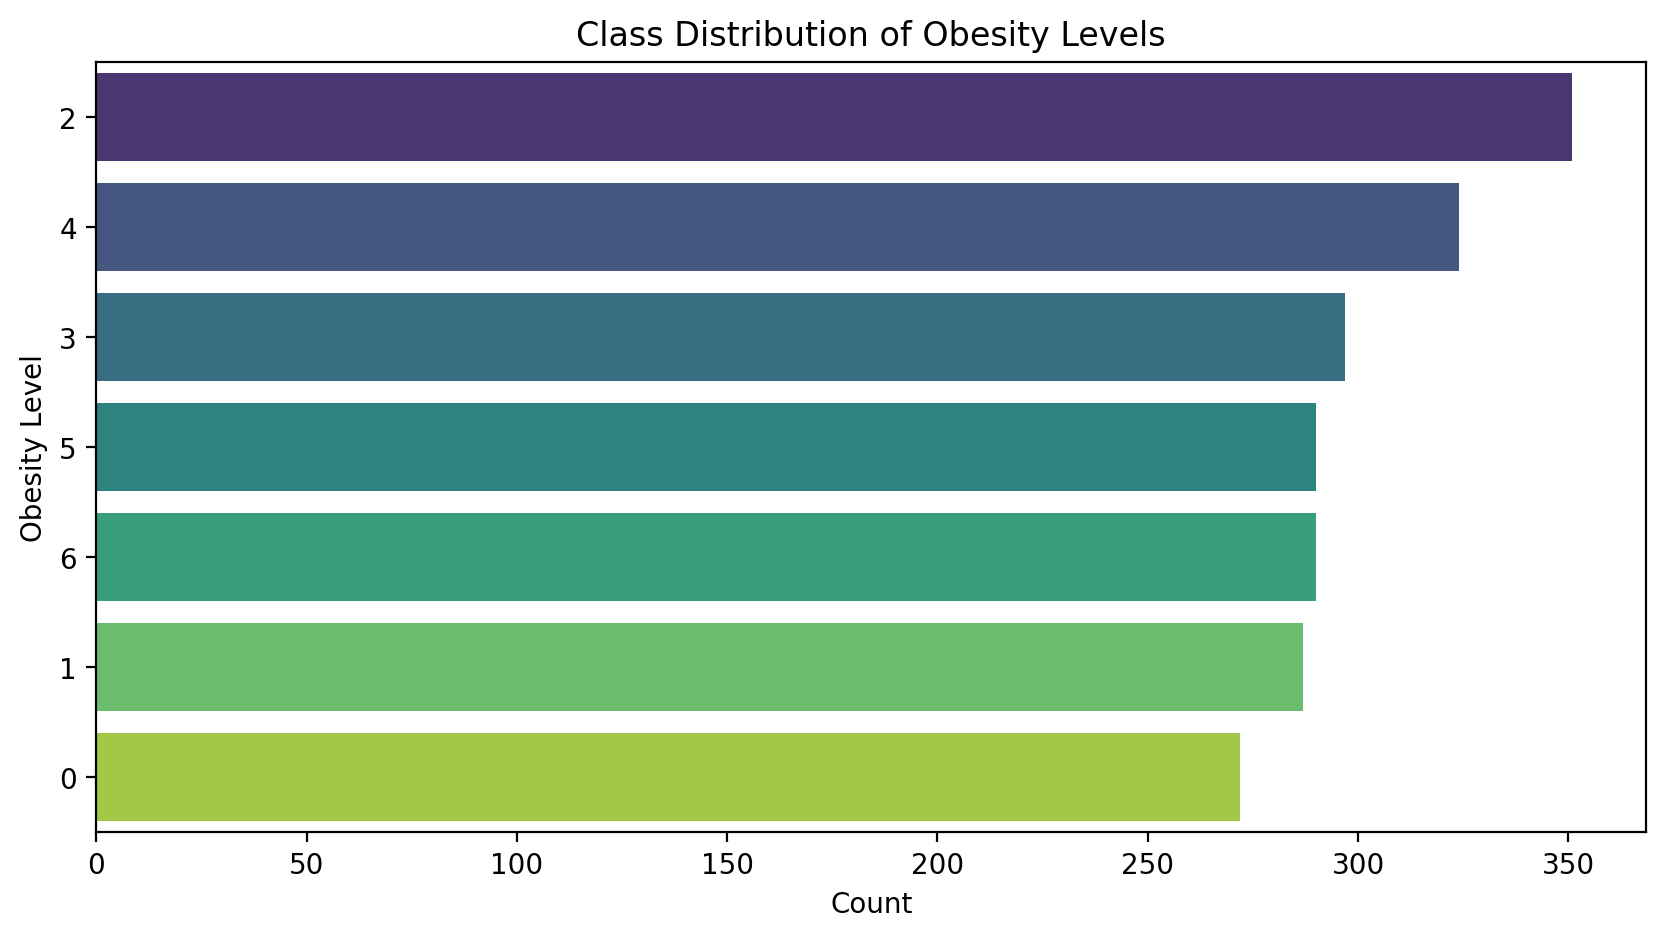

Missing values in each column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [8]:
# Check for missing values
missing_values = df.isnull().sum()

# Plot class distribution
if "NObeyesdad" in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df["NObeyesdad"], order=df["NObeyesdad"].value_counts().index, palette="viridis")
    plt.title("Class Distribution of Obesity Levels")
    plt.xlabel("Count")
    plt.ylabel("Obesity Level")
    plt.show()
else:
    print("Column 'NObeyesdad' not found in DataFrame.")

# Display missing values info
print("Missing values in each column:")
print(missing_values)

In [9]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop("NObeyesdad")
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows after preprocessing
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.011914,-0.521741,-0.874380,-0.862558,0.472291,-2.759769,-0.784810,0.404102,0.300346,-0.145900,-0.013141,-0.218272,-1.188028,0.562005,1.419172,0.503337,1
1,-1.011914,-0.521741,-1.945660,-1.168077,0.472291,-2.759769,1.088307,0.404102,0.300346,6.853997,1.618701,4.581439,2.339676,-1.080619,-0.521160,0.503337,1
2,0.988227,-0.207057,1.053924,-0.366089,0.472291,-2.759769,-0.784810,0.404102,0.300346,-0.145900,-0.013141,-0.218272,1.163774,0.562005,-2.461491,0.503337,1
3,0.988227,0.422312,1.053924,0.015809,-2.117337,-2.759769,1.088307,0.404102,0.300346,-0.145900,-0.013141,-0.218272,1.163774,-1.080619,-2.461491,1.296280,5
4,0.988227,-0.364399,0.839668,0.122741,-2.117337,-2.759769,-0.784810,-2.166941,0.300346,-0.145900,-0.013141,-0.218272,-1.188028,-1.080619,-0.521160,0.503337,6


In [7]:
# Split data into features (X) and target (y)
X = df.drop(columns=["NObeyesdad"])
y = df["NObeyesdad"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.8699763593380615,
 '              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94        54\n           1       0.83      0.69      0.75        58\n           2       0.88      0.93      0.90        70\n           3       0.95      0.98      0.97        60\n           4       1.00      0.98      0.99        65\n           5       0.70      0.78      0.74        58\n           6       0.81      0.72      0.76        58\n\n    accuracy                           0.87       423\n   macro avg       0.87      0.87      0.87       423\nweighted avg       0.87      0.87      0.87       423\n')